In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("./healthcare-dataset-stroke-data.csv")

In [3]:
data['bmi'] = data['bmi'].fillna(round (data['bmi'].mean(), 2))
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [6]:
data['gender'] = label_gender.fit_transform(data['gender'])
data['ever_married'] = label_married.fit_transform(data['ever_married'])
data['work_type']= label_work.fit_transform(data['work_type'])
data['Residence_type']= label_residence.fit_transform(data['Residence_type'])
data['smoking_status']= label_smoking.fit_transform(data['smoking_status'])

In [7]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00,2,1


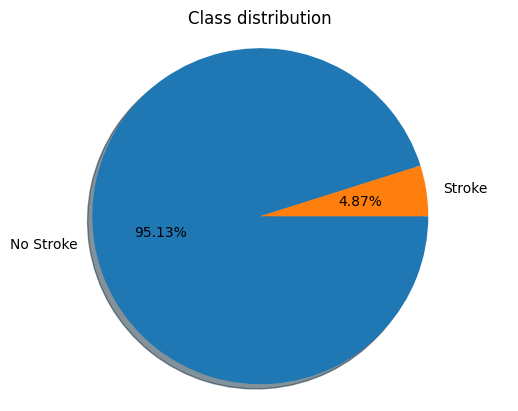

# samples associated with no stroke: 4861
# samples associated with stroke: 249


In [8]:
class_occur = data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [9]:
X  = data[['gender','age','hypertension','heart_disease', 'ever_married', 'work_type', 'bmi', 'smoking_status']]
y = data['stroke']

In [16]:
data_ori = pd.read_csv("./healthcare-dataset-stroke-data.csv")

In [18]:
data_ori.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [54]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00,2,1


In [17]:
print("Unique 'gender': {}".format(data_ori['gender'].unique()))
print("Unique 'ever_married': {}".format(data_ori['ever_married'].unique()))
print("Unique 'work_type': {}".format(data_ori['work_type'].unique()))
print("Unique 'Residence_type': {}".format(data_ori['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(data_ori['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [15]:
print("Unique 'gender': {}".format(data['gender'].unique()))
print("Unique 'ever_married': {}".format(data['ever_married'].unique()))
print("Unique 'work_type': {}".format(data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(data['smoking_status'].unique()))

Unique 'gender': [1 0 2]
Unique 'ever_married': [1 0]
Unique 'work_type': [2 3 0 4 1]
Unique 'Residence_type': [1 0]
Unique 'smoking_status': [1 2 3 0]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train)

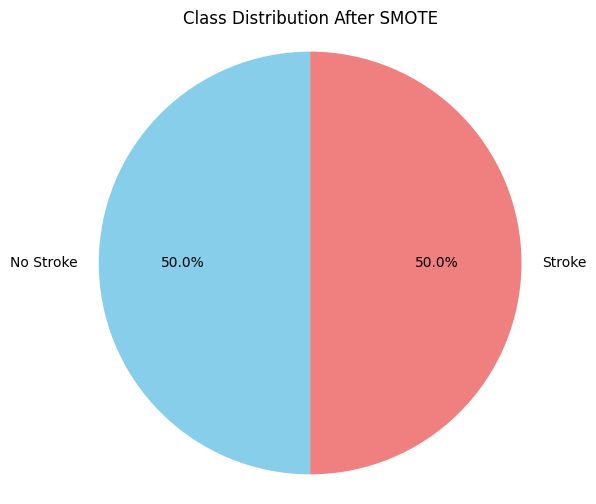

In [11]:
from collections import Counter

distribution = Counter(y_resample)

labels = ['No Stroke', 'Stroke']
counts = [distribution[0], distribution[1]]

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution After SMOTE')
plt.axis('equal')  # Equal aspect ratio to ensure the pie is circular
plt.show()


In [12]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_resample)
X_test_normalized = scaler.transform(X_test)

In [13]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train_normalized, y_resample)

y_pred = log_reg.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7515
Precision: 0.1444
Recall: 0.6290
F1 Score: 0.2349

Confusion Matrix:
[[729 231]
 [ 23  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       960
           1       0.14      0.63      0.23        62

    accuracy                           0.75      1022
   macro avg       0.56      0.69      0.54      1022
weighted avg       0.92      0.75      0.81      1022



X  = data[['gender','age','hypertension','heart_disease', 'ever_married', 'work_type', 'bmi', 'smoking_status']]

In [60]:
test = np.array([[1, 50.0, 0, 0, 1, 2, 25, 2]])
test_normal = scaler.transform(test)

log_reg.predict_proba(test_normal)

/home/rid/miniconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.82555476, 0.17444524]])